In [9]:
import requests
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

In [10]:
# Téléchargement du fichier CIF du matériau LiZnAs
with MPRester("oZkH8kj10DOmI5dC") as m:
    structure = m.get_structure_by_material_id("mp-9124")
    w = CifWriter(structure)
    w.write_file("LiZnAs.cif")

In [11]:
# Calcul des pics de diffraction pour un rayonnement X incident Cu Kα de longueur d'onde λ=1.54060 Å
xrd_calc = XRDCalculator(wavelength='CuKa', symprec=0.1)
pattern = xrd_calc.get_pattern(structure)

In [12]:
# Affichage des 3 premiers pics du diffractogramme
for i in range(3):
    print("Pic", i+1, " : 2θ =", pattern.x[i], "Intensité =", pattern.y[i], "%")
    hkl = pattern.hkls[i]
    print("     Indices hkl associés :", hkl[0]["hkl"])

Pic 1  : 2θ = 25.811348959066418 Intensité = 100.0 %
     Indices hkl associés : (1, 1, 1)
Pic 2  : 2θ = 29.89080620244843 Intensité = 0.0022816345260402034 %
     Indices hkl associés : (2, 0, 0)
Pic 3  : 2θ = 42.78114198762097 Intensité = 86.98941656705598 %
     Indices hkl associés : (2, 2, 0)


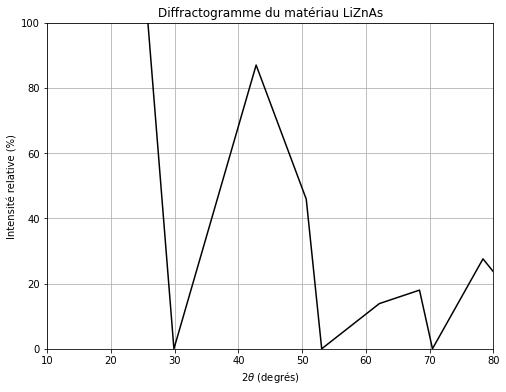

In [13]:
# Plot du diffractogramme
plt.figure(figsize=(8, 6))
plt.plot(pattern.x, pattern.y, 'k')
plt.xlabel(r"2$\theta$ (degrés)")
plt.ylabel("Intensité relative (%)")
plt.title("Diffractogramme du matériau LiZnAs")
plt.xlim(10, 80)
plt.ylim(0, 100)
plt.grid(True)
plt.show()